In [1]:
import json
import matplotlib.pyplot as plt

In [79]:
projects = [
    "guava",
    "jackson",
    "junit4",
    "lombok",
    "mockito",
    "netty"
]

In [3]:
def readProjectData(projectName, generation):
    with open(f"../results/{generation}/{projectName}.json") as f:
        data = json.load(f)
        data.pop("commitsSize")
        return data

def getPropertyPlotData(projectData, evaluation, propertyName):
    x, y = [], []
    
    for key, value in projectData.items():
        y_value = value[evaluation][propertyName]
        if y_value == 'NaN': continue
        
        x.append(key)
        y.append(y_value)
    
    return x, y

In [87]:
def plotNavigation(generation):
    evaluation = "navigation"
    figure = plt.figure(figsize=(15, 7))

    axPrecision = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=figure)
    axFairPrecision = plt.subplot2grid((2,6), (0,2), colspan=2)
    axRecall = plt.subplot2grid((2,6), (0,4), colspan=2)
    axFairRecall = plt.subplot2grid((2,6), (1,1), colspan=2)
    axCorrectInTop = plt.subplot2grid((2,6), (1,3), colspan=2)
    
    axPrecision.set_xlabel("Minimum support")
    axFairPrecision.set_xlabel("Minimum support")
    axRecall.set_xlabel("Minimum support")
    axFairRecall.set_xlabel("Minimum support")
    axCorrectInTop.set_xlabel("Minimum support")
    
    axPrecision.set_ylabel("Precision")
    axFairPrecision.set_ylabel("Fair precision")
    axRecall.set_ylabel("Recall")
    axFairRecall.set_ylabel("Fair recall")
    axCorrectInTop.set_ylabel("Correct in top")
    
    for project in projects:
        data = readProjectData(project, generation)
        project = project.capitalize()
        
        axPrecision.plot(*getPropertyPlotData(data, evaluation, "precision"), label=project)
        axFairPrecision.plot(*getPropertyPlotData(data, evaluation, "fairPrecision"), label=project)
        axRecall.plot(*getPropertyPlotData(data, evaluation, "recall"), label=project)
        axFairRecall.plot(*getPropertyPlotData(data, evaluation, "fairRecall"), label=project)
        axCorrectInTop.plot(*getPropertyPlotData(data, evaluation, "fairCorrectInTop"), label=project)
        
    axPrecision.legend()
    axFairPrecision.legend()
    axRecall.legend()
    axFairRecall.legend()
    axCorrectInTop.legend()
    
    figure.tight_layout()
    
    
def plotPrevention(generation):
    evaluation = "prevention"
    figure = plt.figure(figsize=(15, 10))
        
    axFairPrecision = plt.subplot2grid((2,6), (0,2), colspan=2)
    axRecall = plt.subplot2grid((2,6), (0,4), colspan=2)
    
    axFairPrecision.set_xlabel("Minimum support")
    axRecall.set_xlabel("Minimum support")

    axFairPrecision.set_ylabel("Fair precision")
    axRecall.set_ylabel("Recall")
    
    for project in projects:
        data = readProjectData(project, generation)
        project = project.capitalize()
        
        axFairPrecision.plot(*getPropertyPlotData(data, evaluation, "fairPrecision"), label=project)
        axRecall.plot(*getPropertyPlotData(data, evaluation, "recall"), label=project)
        
    axFairPrecision.legend()
    axRecall.legend()
    
    figure.tight_layout()
    

def plotFalseAlarm(generation):
    evaluation = "falseAlarm"
    figure = plt.figure(figsize=(15, 10))
        
    axPrecision = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=figure)
    
    axPrecision.set_xlabel("Minimum support")
    axPrecision.set_ylabel("Precision")
    
    for project in projects:
        data = readProjectData(project, generation)
        project = project.capitalize()
        axPrecision.plot(*getPropertyPlotData(data, evaluation, "precision"), label=project)
        
    axPrecision.legend()
    
    figure.tight_layout()

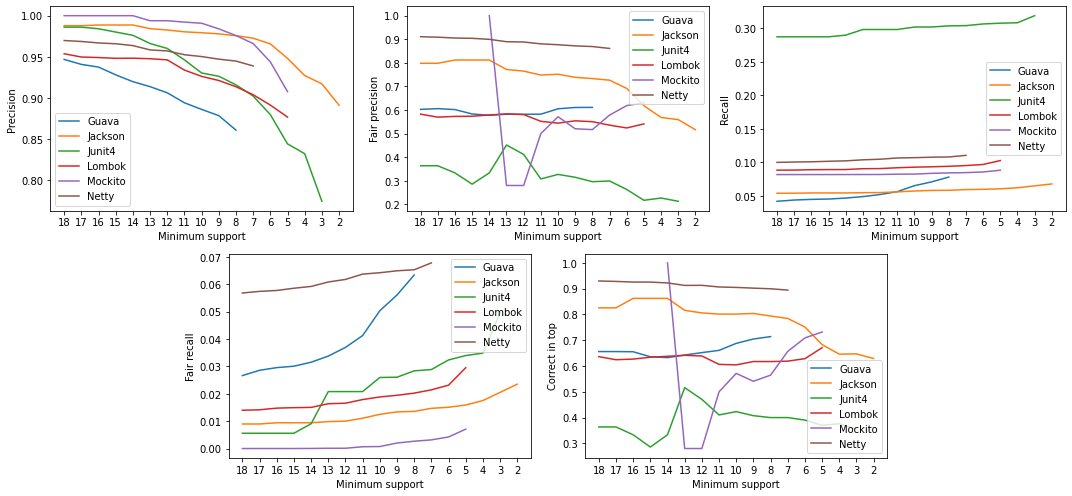

In [83]:
plotNavigation('gen6_max5_30s')

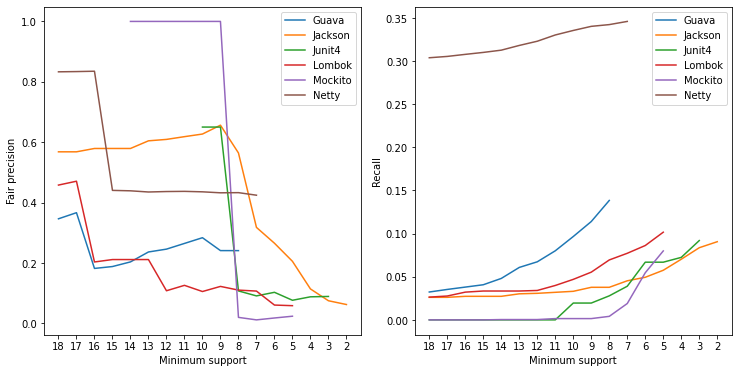

In [88]:
plotPrevention('gen7_max5_30s')

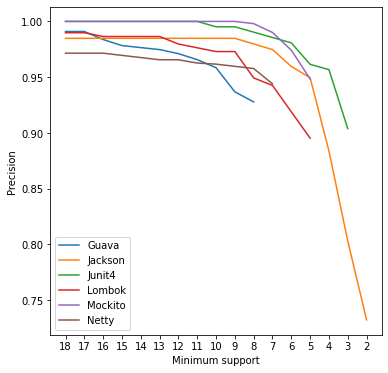

In [89]:
plotFalseAlarm('gen6_max5_30s')

In [12]:
def plotDoubleProperty(evaluation, property_name):
    figure = plt.figure(figsize=(6, 6))
    for project in projects:
        data = readProjectData(project, 'gen6_max5_30s')
        plt.plot(*getPropertyPlotData(data, evaluation, property_name), label=project.capitalize())
    plt.legend()
    #plt.savefig(f"../pics/{evaluation}_{property_name}.png")

In [47]:
def plotProperty(propertyName):
    figure = plt.figure(figsize=(6, 6))
    for project in projects:
        data = readProjectData(project, 'gen6_max5_30s')
        x, y = [], []
        for key, value in data.items():
            x.append(key)
            y.append(value[propertyName])
        plt.plot(x, y, label=project.capitalize())
    plt.legend()
    plt.ylim(0, 20000)

In [ ]:
plotProperty('miningTime')

In [ ]:
plotProperty('evaluationTime')

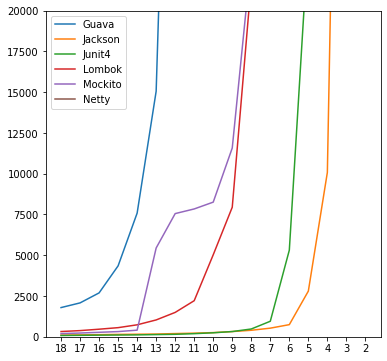

In [48]:
plotProperty('itemsetsSize')

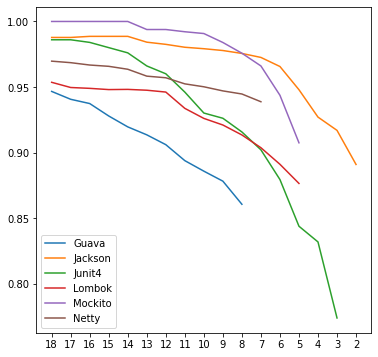

In [13]:
plotDoubleProperty('navigation', 'precision')

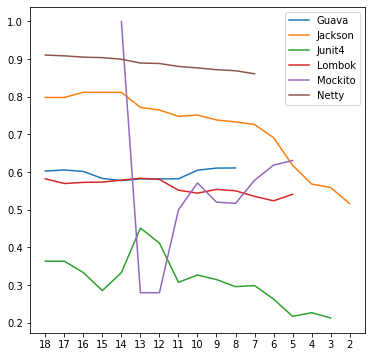

In [14]:
plotDoubleProperty('navigation', 'fairPrecision')

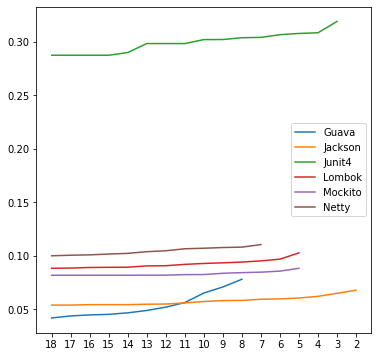

In [15]:
plotDoubleProperty('navigation', 'recall')

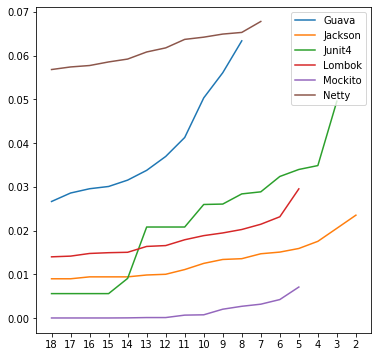

In [16]:
plotDoubleProperty('navigation', 'fairRecall')

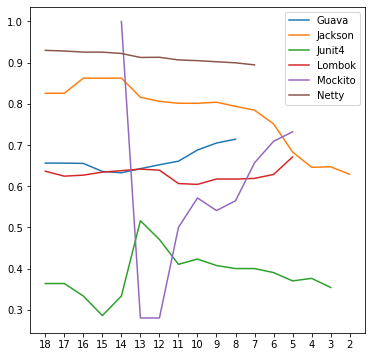

In [17]:
plotDoubleProperty('navigation', 'fairCorrectInTop')

In [69]:
def plotCommitsSize():
    x, y = [], []
    for project in projects:
        x.append(project.capitalize())
        with open(f"../results/gen7_max5_30s/{project}.json") as f:
            y.append(json.load(f)["commitsSize"])
    plt.bar(x, y, width = 0.5)

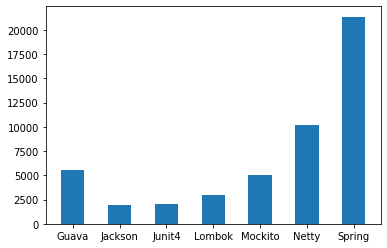

In [70]:
plotCommitsSize()